In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import datetime
from datetime import date
import math
import os
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
from sklearn.metrics import mean_squared_error
from sklearn.cluster import SpectralClustering
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import preprocessing
from random import sample 
import plotly.express as px
from collections import Counter

sns.set(rc={'figure.figsize':(12,10)})
sns.set(style="white", context="talk")

%matplotlib inline

In [2]:
os.chdir('C:\\NY_CRIMES\\')


In [3]:
dframe = pd.read_csv('Crime_type_detection_filtred_n.csv')


In [8]:
dframe.head()

,ADDR_PCT_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,BORO_NM,PREM_TYP_DESC,JURISDICTION_CODE,Latitude,Longitude,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,DateTime
0,47.0,ROBBERY,380.0,"ROBBERY,CAR JACKING",COMPLETED,BRONX,STREET,0.0,40.887644,-73.852103,PATROL BORO BRONX,25-44,WHITE HISPANIC,M,1.488785e+09
1,115.0,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,QUEENS,STREET,0.0,40.753515,-73.856826,PATROL BORO QUEENS NORTH,25-44,BLACK HISPANIC,M,1.468686e+09
2,67.0,ROBBERY,382.0,"ROBBERY,NECKCHAIN/JEWELRY",ATTEMPTED,BROOKLYN,STREET,0.0,40.652327,-73.927517,PATROL BORO BKLYN SOUTH,25-44,BLACK,F,1.484759e+09
3,106.0,ROBBERY,389.0,"ROBBERY,DWELLING",COMPLETED,QUEENS,RESIDENCE-HOUSE,0.0,40.682983,-73.832434,PATROL BORO QUEENS SOUTH,25-44,ASIAN / PACIFIC ISLANDER,M,1.285949e+09
4,6.0,ROBBERY,396.0,"ROBBERY,BEGIN AS SHOPLIFTING",COMPLETED,MANHATTAN,CHAIN STORE,0.0,40.735036,-73.991237,PATROL BORO MAN SOUTH,UNKNOWN,BLACK,D,1.373026e+09


C:\Users\MSI\AppData\Local\Temp\ipykernel_6732\3315525640.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dframe.corr()


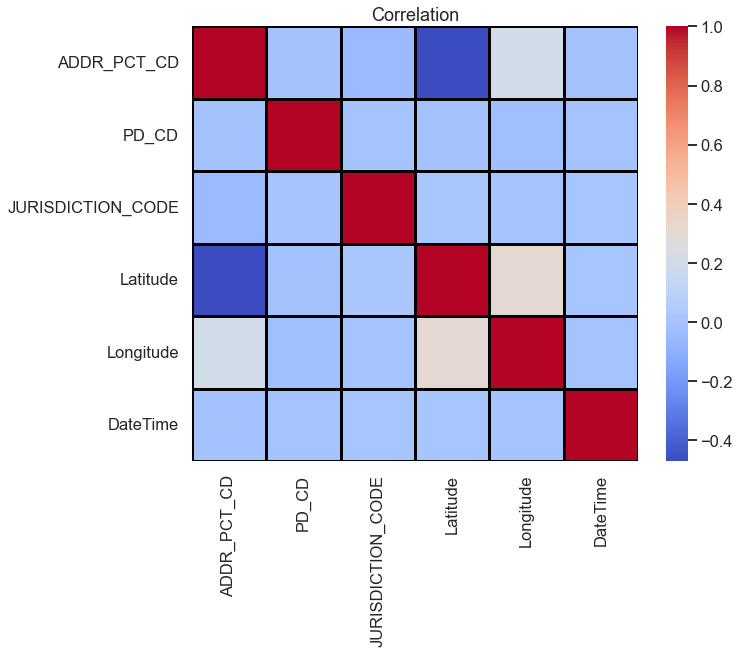

In [7]:
corr = dframe.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = "coolwarm", linewidth = 3, linecolor = "Black")
plt.title("Correlation")
plt.show()

In [9]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3788812 entries, 0 to 3788811
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ADDR_PCT_CD        float64
 1   OFNS_DESC          object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   CRM_ATPT_CPTD_CD   object 
 5   BORO_NM            object 
 6   PREM_TYP_DESC      object 
 7   JURISDICTION_CODE  float64
 8   Latitude           float64
 9   Longitude          float64
 10  PATROL_BORO        object 
 11  VIC_AGE_GROUP      object 
 12  VIC_RACE           object 
 13  VIC_SEX            object 
 14  DateTime           float64
dtypes: float64(6), object(9)
memory usage: 433.6+ MB


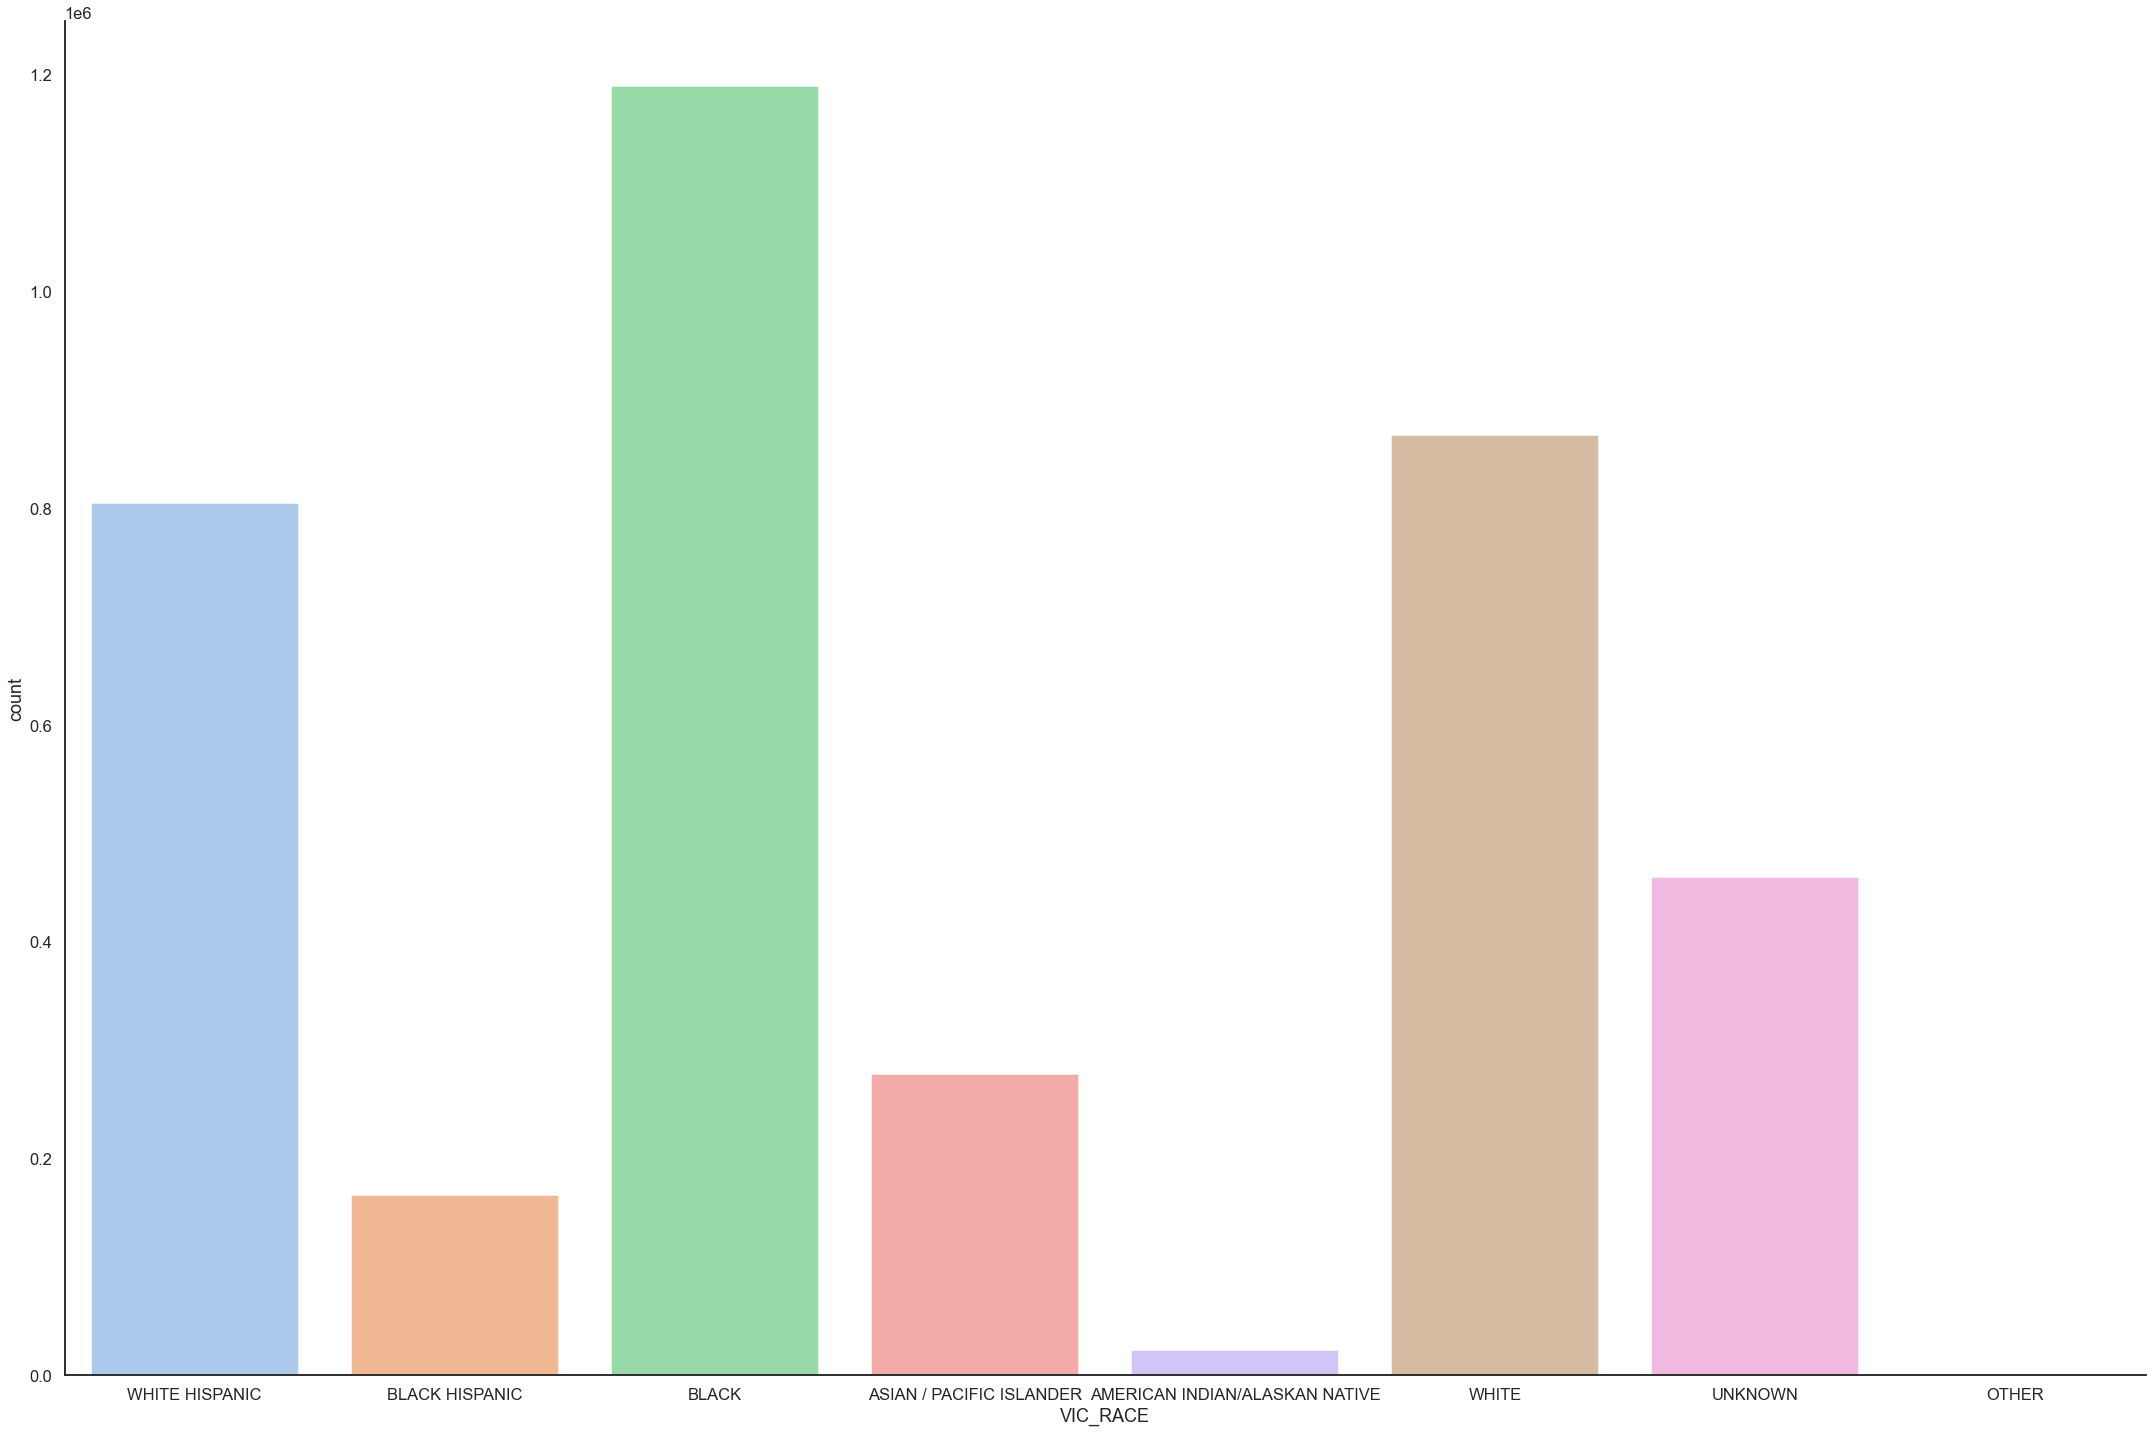

In [10]:
#Number of victims by race

sns.catplot(x="VIC_RACE", data=dframe,kind="count", palette="pastel", height=20, aspect=1.5);


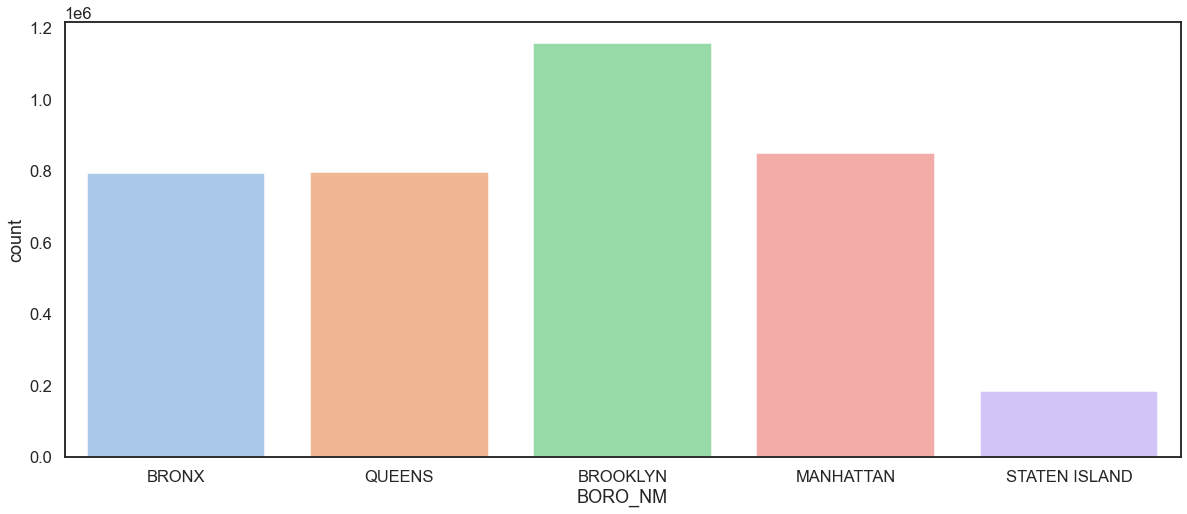

In [11]:
#Occurrence of incidents by borough 

f, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x="BORO_NM", data=dframe, palette="pastel");

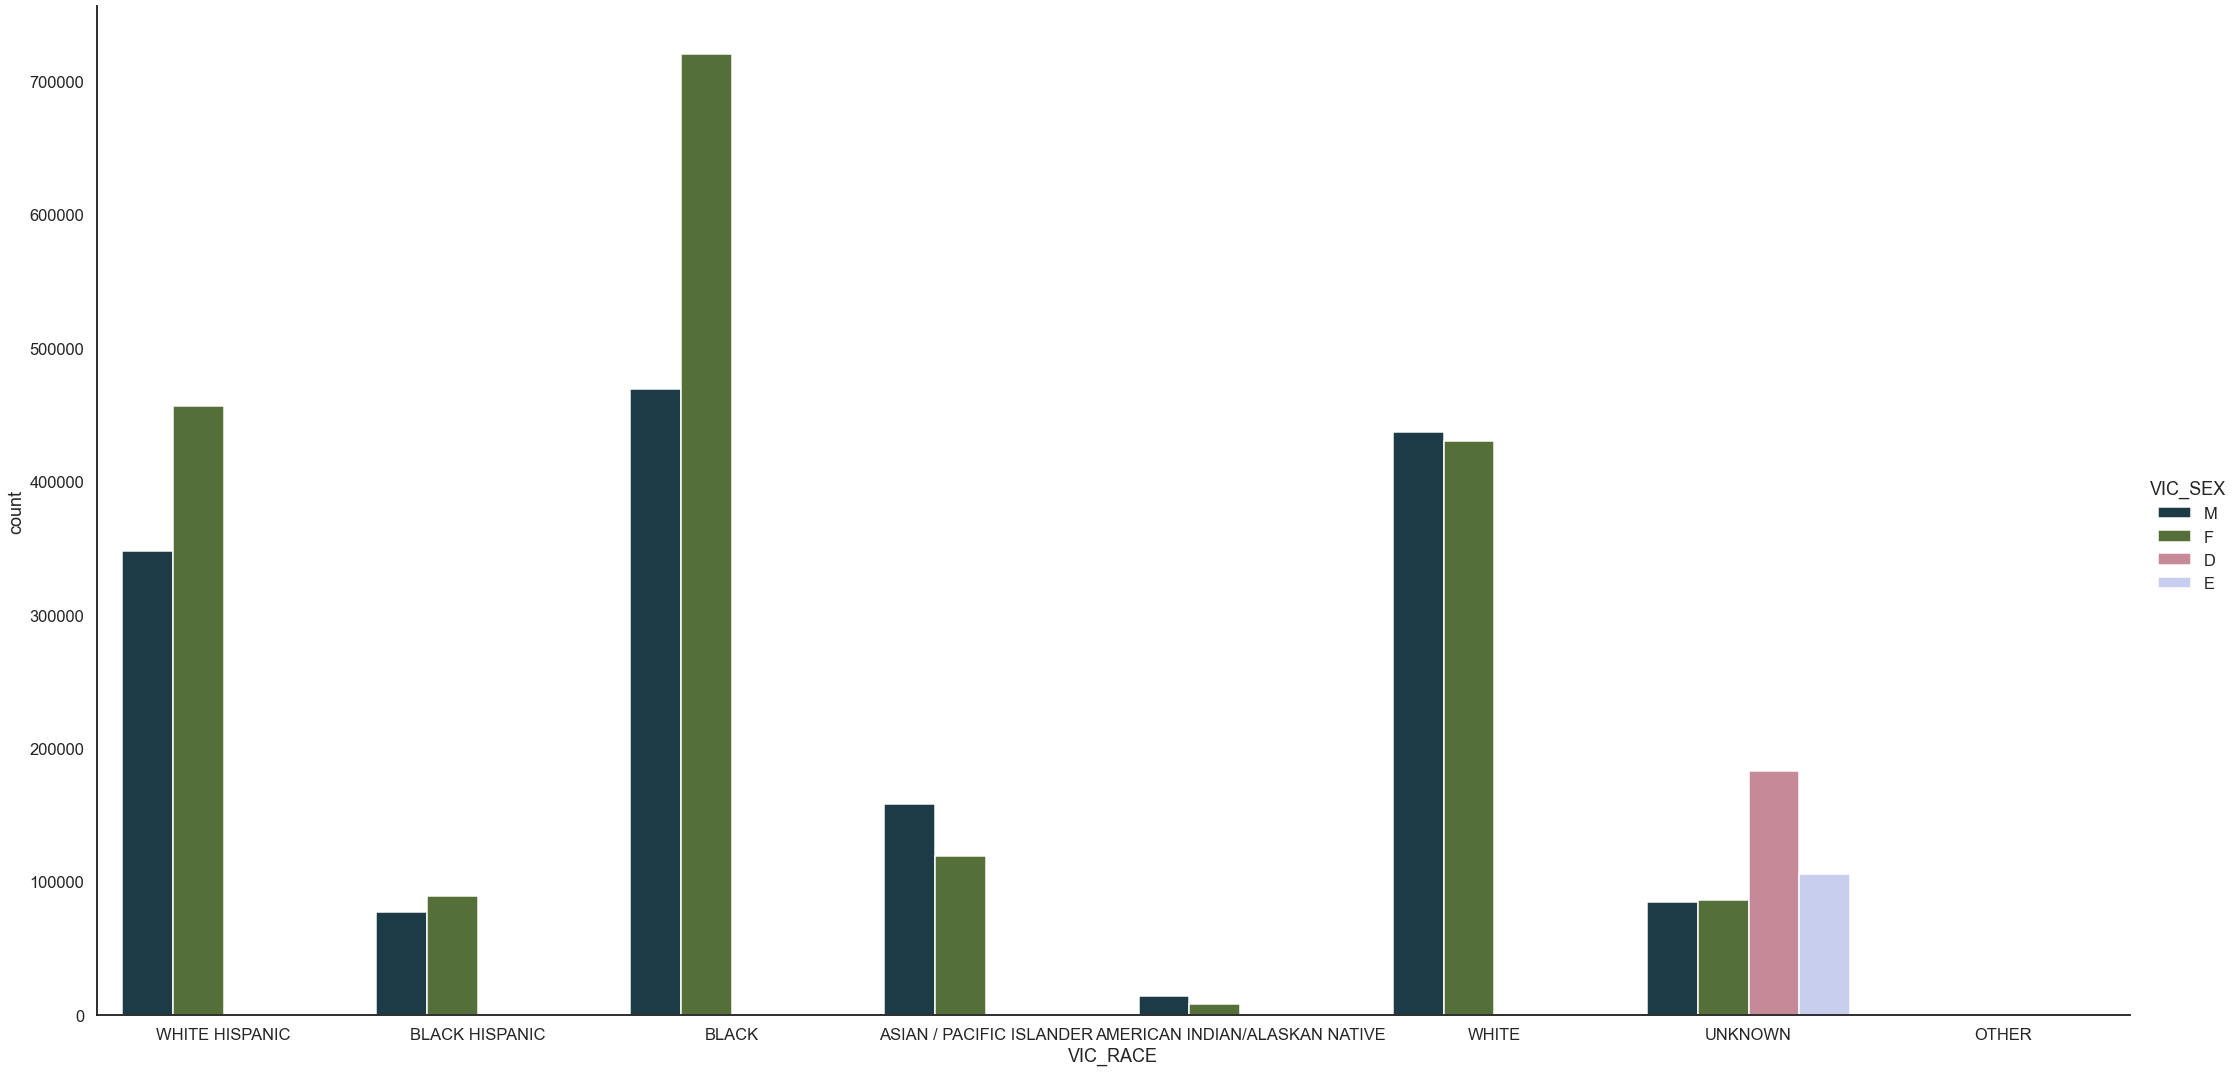

In [19]:
#Number of victims by Race and Sexe
ax = sns.catplot(x="VIC_RACE", hue="VIC_SEX", kind="count",palette="cubehelix", data=dframe, height=15, aspect=2)

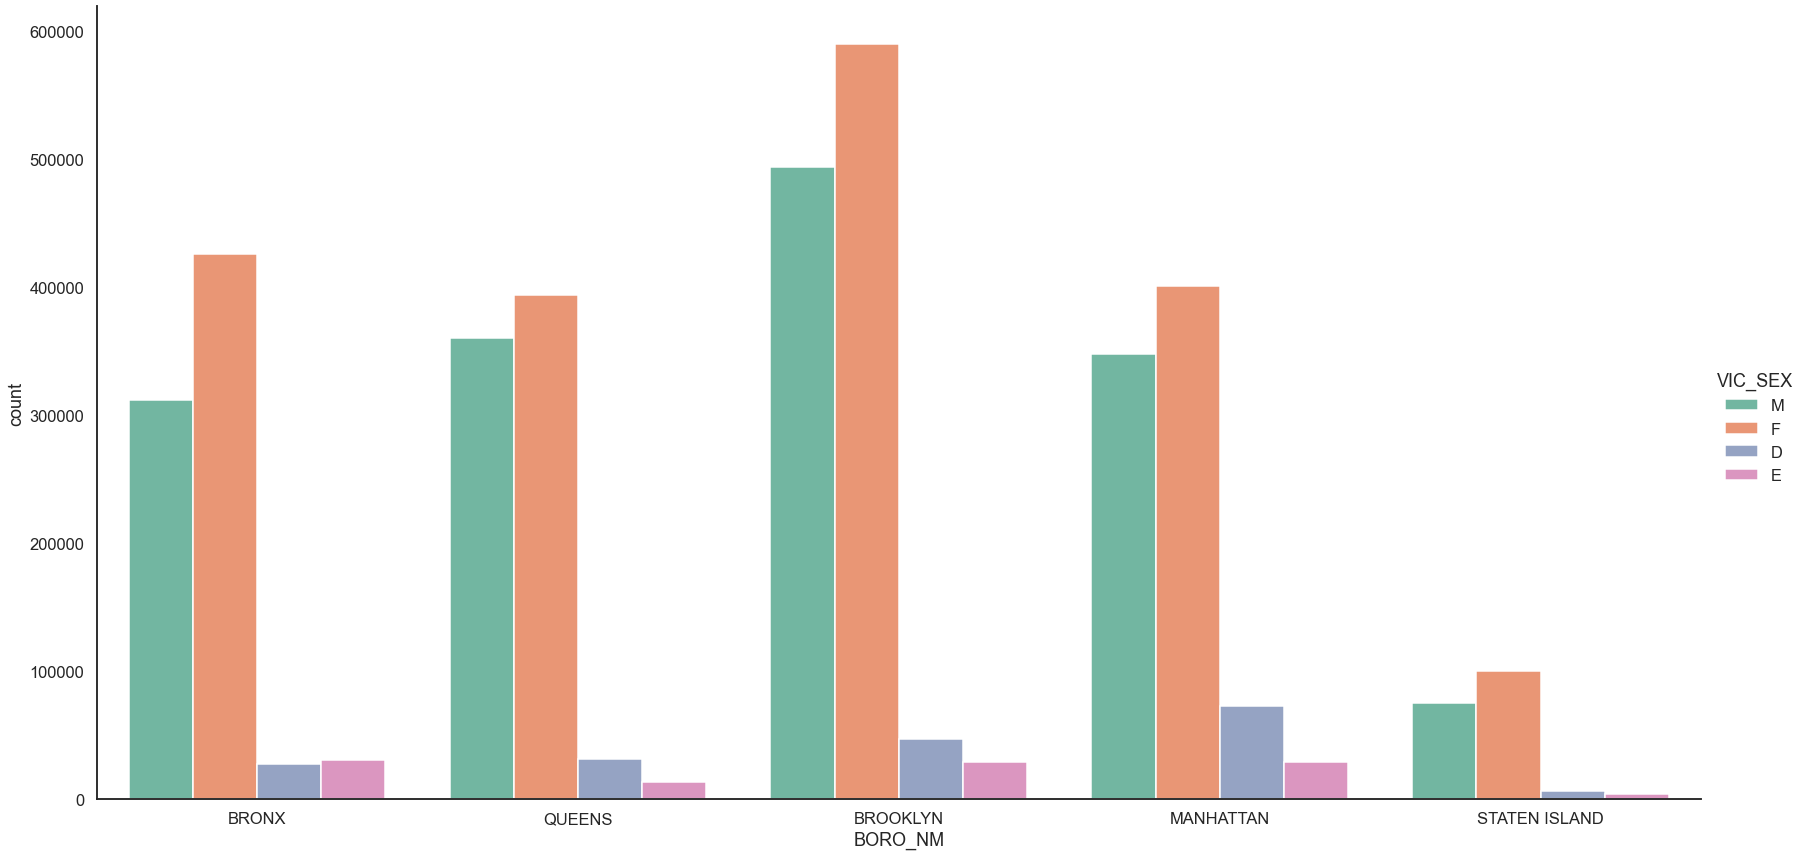

In [20]:
#Total number of victims by Sexe gender in the different boroughs
sns.catplot(x="BORO_NM", kind="count",hue="VIC_SEX",palette="Set2", data=dframe,height=12, aspect = 2);

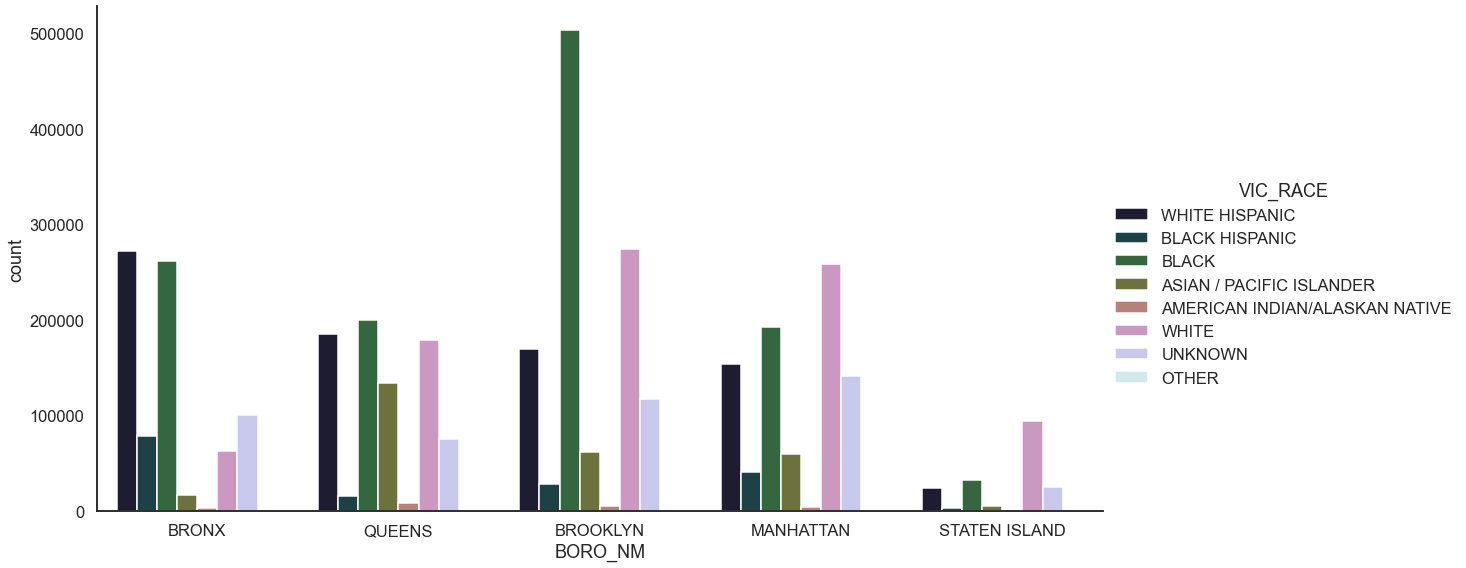

In [21]:
#Number of victims by Race in the different boroughs

ax = sns.catplot(x="BORO_NM", hue="VIC_RACE", kind="count",palette="cubehelix", data=dframe, height=8, aspect = 2)

In [22]:

#Creation of Heatmap

positions = list(zip(dframe['Latitude'], dframe['Longitude']))
tiles = 'Stamen Terrain'
fol = folium.Map(location=[40.75,-73.98], zoom_start=10, tiles = tiles)
pos_samp = sample(positions, 22000)#22K is the max now as we join both DS togather 
HeatMap(pos_samp, radius = 8).add_to(fol) 
fol